### Importing Libraries

In [1]:
import pandas as pd 
import numpy as np 


In [2]:
np.set_printoptions(suppress=True, linewidth=100, precision=2)

### Importing Data

In [3]:
filePath = 'loan-data.csv'
loaded_loan_data = np.genfromtxt('loan-data-utf8.csv', delimiter=';',skip_header=1, autostrip=True)

In [4]:
loaded_loan_data

array([[48010226.  ,         nan,    35000.  , ...,         nan,         nan,     9452.96],
       [57693261.  ,         nan,    30000.  , ...,         nan,         nan,     4679.7 ],
       [59432726.  ,         nan,    15000.  , ...,         nan,         nan,     1969.83],
       ...,
       [50415990.  ,         nan,    10000.  , ...,         nan,         nan,     2185.64],
       [46154151.  ,         nan,         nan, ...,         nan,         nan,     3199.4 ],
       [66055249.  ,         nan,    10000.  , ...,         nan,         nan,      301.9 ]],
      shape=(10000, 14))

### Checking Incomplete Data

In [5]:
print(np.isnan(loaded_loan_data).sum())
print(loaded_loan_data.shape)

88005
(10000, 14)


In [6]:
temporary_fill_highest = np.nanmax(loaded_loan_data) + 1
temporary_fill_mean = np.nanmean(loaded_loan_data, axis=0)


/var/folders/xz/qxr61_851tb6_f56ygv7nw980000gn/T/ipykernel_22889/2899459135.py:2: RuntimeWarning: Mean of empty slice
  temporary_fill_mean = np.nanmean(loaded_loan_data, axis=0)


In [7]:
temporary_fill_highest

np.float64(68616520.0)

In [8]:
temporary_fill_mean

array([54015809.19,         nan,    15273.46,         nan,    15311.04,         nan,       16.62,
            440.92,         nan,         nan,         nan,         nan,         nan,     3143.85])

In [9]:
temporary_stats = np.array([np.nanmin(loaded_loan_data,  axis = 0),
                            temporary_fill_mean, 
                            np.nanmax(loaded_loan_data, axis = 0)])
                         

/var/folders/xz/qxr61_851tb6_f56ygv7nw980000gn/T/ipykernel_22889/3083744874.py:1: RuntimeWarning: All-NaN slice encountered
  temporary_stats = np.array([np.nanmin(loaded_loan_data,  axis = 0),
/var/folders/xz/qxr61_851tb6_f56ygv7nw980000gn/T/ipykernel_22889/3083744874.py:3: RuntimeWarning: All-NaN slice encountered
  np.nanmax(loaded_loan_data, axis = 0)])


In [10]:
temporary_stats

array([[  373332.  ,         nan,     1000.  ,         nan,     1000.  ,         nan,        6.  ,
              31.42,         nan,         nan,         nan,         nan,         nan,        0.  ],
       [54015809.19,         nan,    15273.46,         nan,    15311.04,         nan,       16.62,
             440.92,         nan,         nan,         nan,         nan,         nan,     3143.85],
       [68616519.  ,         nan,    35000.  ,         nan,    35000.  ,         nan,       28.99,
            1372.97,         nan,         nan,         nan,         nan,         nan,    41913.62]])

### Splitting the Dataset

In [11]:
columns_Strings = np.argwhere(np.isnan(temporary_fill_mean)).squeeze()
columns_Strings

array([ 1,  3,  5,  8,  9, 10, 11, 12])

In [12]:
columns_numeric = np.argwhere(np.isnan(temporary_fill_mean) == False).squeeze()
columns_numeric 

array([ 0,  2,  4,  6,  7, 13])

### Re-Importing the Data

In [13]:
loaded_loan_strings = np.genfromtxt('loan-data-utf8.csv', delimiter=';',skip_header=1, autostrip=True, usecols = columns_Strings, dtype=str)
loaded_loan_numeric = np.genfromtxt('loan-data-utf8.csv', delimiter=';',skip_header=1, autostrip=True, usecols = columns_numeric, filling_values=temporary_fill_highest)

In [14]:
loaded_loan_strings

array([['May-15', 'Current', '36 months', ..., 'Verified',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=48010226', 'CA'],
       ['', 'Current', '36 months', ..., 'Source Verified',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=57693261', 'NY'],
       ['Sep-15', 'Current', '36 months', ..., 'Verified',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=59432726', 'PA'],
       ...,
       ['Jun-15', 'Current', '36 months', ..., 'Source Verified',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=50415990', 'CA'],
       ['Apr-15', 'Current', '36 months', ..., 'Source Verified',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=46154151', 'OH'],
       ['Dec-15', 'Current', '36 months', ..., '',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=66055249', 'IL']],
      shape=(10000, 8), dtype='<U69')

In [15]:
loaded_loan_numeric

array([[48010226.  ,    35000.  ,    35000.  ,       13.33,     1184.86,     9452.96],
       [57693261.  ,    30000.  ,    30000.  , 68616520.  ,      938.57,     4679.7 ],
       [59432726.  ,    15000.  ,    15000.  , 68616520.  ,      494.86,     1969.83],
       ...,
       [50415990.  ,    10000.  ,    10000.  , 68616520.  , 68616520.  ,     2185.64],
       [46154151.  , 68616520.  ,    10000.  ,       16.55,      354.3 ,     3199.4 ],
       [66055249.  ,    10000.  ,    10000.  , 68616520.  ,      309.97,      301.9 ]],
      shape=(10000, 6))

In [16]:
loaded_headers = np.genfromtxt('loan-data-utf8.csv', delimiter=';',skip_footer=loaded_loan_data.shape[0],dtype=str , autostrip=True)
loaded_headers


array(['id', 'issue_d', 'loan_amnt', 'loan_status', 'funded_amnt', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'verification_status', 'url', 'addr_state',
       'total_pymnt'], dtype='<U19')

In [17]:
header_strings, header_numeric = loaded_headers[columns_Strings], loaded_headers[columns_numeric]

In [18]:
print(header_strings)

print(header_numeric)

['issue_d' 'loan_status' 'term' 'grade' 'sub_grade' 'verification_status' 'url' 'addr_state']
['id' 'loan_amnt' 'funded_amnt' 'int_rate' 'installment' 'total_pymnt']


### Creating Checkpoints

In [128]:
def checkpoint(file_name, checkpoint_header, checkpoint_data):
    np.savez(file_name, header=checkpoint_header, data=checkpoint_data)
    checkpoint_variable = np.load(file_name + ".npz")
    return (checkpoint_variable)

In [20]:
checkpoint_strings = checkpoint('checkpoint-strings', header_strings, loaded_loan_strings)
checkpoint_strings['data']

array([['May-15', 'Current', '36 months', ..., 'Verified',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=48010226', 'CA'],
       ['', 'Current', '36 months', ..., 'Source Verified',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=57693261', 'NY'],
       ['Sep-15', 'Current', '36 months', ..., 'Verified',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=59432726', 'PA'],
       ...,
       ['Jun-15', 'Current', '36 months', ..., 'Source Verified',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=50415990', 'CA'],
       ['Apr-15', 'Current', '36 months', ..., 'Source Verified',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=46154151', 'OH'],
       ['Dec-15', 'Current', '36 months', ..., '',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=66055249', 'IL']],
      shape=(10000, 8), dtype='<U69')

### Manipulating String Columns

In [21]:
header_strings

array(['issue_d', 'loan_status', 'term', 'grade', 'sub_grade', 'verification_status', 'url',
       'addr_state'], dtype='<U19')

In [22]:
header_strings[0] = 'issue_date'

In [23]:
header_strings

array(['issue_date', 'loan_status', 'term', 'grade', 'sub_grade', 'verification_status', 'url',
       'addr_state'], dtype='<U19')

In [24]:
loaded_loan_strings[:,0]

array(['May-15', '', 'Sep-15', ..., 'Jun-15', 'Apr-15', 'Dec-15'], shape=(10000,), dtype='<U69')

### Issue Date

In [25]:
print(np.unique(loaded_loan_strings[:,0]))
loaded_loan_strings[:,0] = np.chararray.strip(loaded_loan_strings[:,0], "-15")
print(loaded_loan_strings[:,0])


['' 'Apr-15' 'Aug-15' 'Dec-15' 'Feb-15' 'Jan-15' 'Jul-15' 'Jun-15' 'Mar-15' 'May-15' 'Nov-15'
 'Oct-15' 'Sep-15']
['May' '' 'Sep' ... 'Jun' 'Apr' 'Dec']


/var/folders/xz/qxr61_851tb6_f56ygv7nw980000gn/T/ipykernel_22889/335437018.py:2: DeprecationWarning: `np.chararray` is deprecated and will be removed from the main namespace in the future. Use an array with a string or bytes dtype instead.
  loaded_loan_strings[:,0] = np.chararray.strip(loaded_loan_strings[:,0], "-15")


In [26]:
months = np.array(['','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

In [27]:
for i in range(13):
    loaded_loan_strings[:,0] = np.where(loaded_loan_strings[:,0]== months[i],
                                       str(i),
                                       loaded_loan_strings[:,0])

In [28]:
loaded_loan_strings[:,0]
np.unique(loaded_loan_strings[:,0])

array(['0', '1', '10', '11', '12', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U69')

In [29]:
header_strings

array(['issue_date', 'loan_status', 'term', 'grade', 'sub_grade', 'verification_status', 'url',
       'addr_state'], dtype='<U19')

### Loan Status

In [30]:
np.unique(loaded_loan_strings[:,1])

array(['', 'Charged Off', 'Current', 'Default', 'Fully Paid', 'In Grace Period', 'Issued',
       'Late (16-30 days)', 'Late (31-120 days)'], dtype='<U69')

In [31]:
np.unique(loaded_loan_strings[:,1]).size
# grouping strings into two groups: good and bac
# 1 for good and 0 for bad 

9

In [32]:
status_bad = np.array(['Charged Off','Default','Late (31-120 days)'])

In [33]:
loaded_loan_strings[:,1] = np.where(np.isin(loaded_loan_strings[:,1], status_bad), 0, 1)

In [34]:
np.unique(loaded_loan_strings[:,1])

array(['0', '1'], dtype='<U69')

### Term

In [35]:
header_strings

array(['issue_date', 'loan_status', 'term', 'grade', 'sub_grade', 'verification_status', 'url',
       'addr_state'], dtype='<U19')

In [36]:
print(loaded_loan_strings[:,2])
print(np.unique(loaded_loan_strings[:,2]))

['36 months' '36 months' '36 months' ... '36 months' '36 months' '36 months']
['' '36 months' '60 months']


In [37]:
loaded_loan_strings[:,2] = np.chararray.strip(loaded_loan_strings[:,2], " months")
loaded_loan_strings[:,2]
print(np.unique(loaded_loan_strings[:,2]))
header_strings

['' '36' '60']


/var/folders/xz/qxr61_851tb6_f56ygv7nw980000gn/T/ipykernel_22889/3980987904.py:1: DeprecationWarning: `np.chararray` is deprecated and will be removed from the main namespace in the future. Use an array with a string or bytes dtype instead.
  loaded_loan_strings[:,2] = np.chararray.strip(loaded_loan_strings[:,2], " months")


array(['issue_date', 'loan_status', 'term', 'grade', 'sub_grade', 'verification_status', 'url',
       'addr_state'], dtype='<U19')

In [38]:
header_strings[2] = "term_months"

In [39]:
loaded_loan_strings[:,2] = np.where(loaded_loan_strings[:,2] == '', 
                                   '60', 
                                   loaded_loan_strings[:,2])

In [40]:
print(np.unique(loaded_loan_strings[:,2]))


['36' '60']


### Grade and Subgrade

In [41]:
np.unique(loaded_loan_strings[:,3])

array(['', 'A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype='<U69')

In [42]:
np.unique(loaded_loan_strings[:,4])

array(['', 'A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4',
       'F5', 'G1', 'G2', 'G3', 'G4', 'G5'], dtype='<U69')

### Filling Sub Grade

In [43]:
for i in np.unique(loaded_loan_strings[:,3])[1:]:
    loaded_loan_strings[:,4] = np.where((loaded_loan_strings[:,4] == '') & (loaded_loan_strings[:,3] ==i),
    i+'5', 
    loaded_loan_strings[:,4])

In [44]:
np.unique(loaded_loan_strings[:,4])

array(['', 'A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4',
       'F5', 'G1', 'G2', 'G3', 'G4', 'G5'], dtype='<U69')

In [45]:
for i in np.unique(loaded_loan_strings[:,3])[1:]:
    loaded_loan_strings[:,4] = np.where((loaded_loan_strings[:,4] == '') ,
    'H1', 
    loaded_loan_strings[:,4])

In [46]:
np.unique(loaded_loan_strings[:,4])
print(header_strings)

['issue_date' 'loan_status' 'term_months' 'grade' 'sub_grade' 'verification_status' 'url'
 'addr_state']


### Removing Grades

In [47]:
loaded_loan_strings = np.delete(loaded_loan_strings,3, axis = 1)

In [48]:
loaded_loan_strings[:,3]

array(['C3', 'A5', 'B5', ..., 'A5', 'D2', 'A4'], shape=(10000,), dtype='<U69')

In [49]:
header_strings = np.delete(header_strings, 3)

In [50]:
header_strings[3]

np.str_('sub_grade')

### Converting Sub Grade

In [51]:
np.unique(loaded_loan_strings[:,3])

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5',
       'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5', 'H1'], dtype='<U69')

In [52]:
keys = list(np.unique(loaded_loan_strings[:,3]).tolist())                
values = list(range(1, np.unique(loaded_loan_strings[:,3]).shape[0] + 1)) 
dict_sub_grade = dict(zip(keys, values))

In [53]:
dict_sub_grade

{'A1': 1,
 'A2': 2,
 'A3': 3,
 'A4': 4,
 'A5': 5,
 'B1': 6,
 'B2': 7,
 'B3': 8,
 'B4': 9,
 'B5': 10,
 'C1': 11,
 'C2': 12,
 'C3': 13,
 'C4': 14,
 'C5': 15,
 'D1': 16,
 'D2': 17,
 'D3': 18,
 'D4': 19,
 'D5': 20,
 'E1': 21,
 'E2': 22,
 'E3': 23,
 'E4': 24,
 'E5': 25,
 'F1': 26,
 'F2': 27,
 'F3': 28,
 'F4': 29,
 'F5': 30,
 'G1': 31,
 'G2': 32,
 'G3': 33,
 'G4': 34,
 'G5': 35,
 'H1': 36}

In [54]:
loaded_loan_strings[:, 3] = np.vectorize(dict_sub_grade.get)(loaded_loan_strings[:, 3])

In [55]:
np.unique(loaded_loan_strings[:,3])

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36',
       '4', '5', '6', '7', '8', '9'], dtype='<U69')

In [56]:
header_strings

array(['issue_date', 'loan_status', 'term_months', 'sub_grade', 'verification_status', 'url',
       'addr_state'], dtype='<U19')

### Verification Status

In [57]:
np.unique(loaded_loan_strings[:,4])

array(['', 'Not Verified', 'Source Verified', 'Verified'], dtype='<U69')

In [58]:
loaded_loan_strings[:,4] = np.where((loaded_loan_strings[:,4] == '')|(loaded_loan_strings[:,4] == 'Not Verified'),0,1)

In [59]:
loaded_loan_strings[:,4]

array(['1', '1', '1', ..., '1', '1', '0'], shape=(10000,), dtype='<U69')

In [60]:
np.unique(loaded_loan_strings[:,4])

array(['0', '1'], dtype='<U69')

### URL

In [61]:
np.unique(loaded_loan_strings[:,5])

array(['https://www.lendingclub.com/browse/loanDetail.action?loan_id=12606806',
       'https://www.lendingclub.com/browse/loanDetail.action?loan_id=13026045',
       'https://www.lendingclub.com/browse/loanDetail.action?loan_id=1312426', ...,
       'https://www.lendingclub.com/browse/loanDetail.action?loan_id=8138291',
       'https://www.lendingclub.com/browse/loanDetail.action?loan_id=8214572',
       'https://www.lendingclub.com/browse/loanDetail.action?loan_id=849994'],
      shape=(10000,), dtype='<U69')

In [62]:
loaded_loan_strings[:,5] = np.chararray.strip(loaded_loan_strings[:,5], 'https://www.lendingclub.com/browse/loanDetail.action?loan_id=')
# here the whole lines are equal but ['=......']

/var/folders/xz/qxr61_851tb6_f56ygv7nw980000gn/T/ipykernel_22889/1578011530.py:1: DeprecationWarning: `np.chararray` is deprecated and will be removed from the main namespace in the future. Use an array with a string or bytes dtype instead.
  loaded_loan_strings[:,5] = np.chararray.strip(loaded_loan_strings[:,5], 'https://www.lendingclub.com/browse/loanDetail.action?loan_id=')


In [63]:
np.unique(loaded_loan_strings[:,5])

array(['12606806', '13026045', '1312426', ..., '8138291', '8214572', '849994'],
      shape=(10000,), dtype='<U69')

In [64]:
loaded_loan_numeric[:,0].astype(dtype=int)

array([48010226, 57693261, 59432726, ..., 50415990, 46154151, 66055249], shape=(10000,))

In [65]:
loaded_loan_strings[:,5].astype(dtype=int)

array([48010226, 57693261, 59432726, ..., 50415990, 46154151, 66055249], shape=(10000,))

In [66]:
np.array_equal(loaded_loan_strings[:,5].astype(dtype=int), loaded_loan_numeric[:,0].astype(dtype=int))

True

In [67]:
loaded_loan_strings = np.delete(loaded_loan_strings, 5, axis = 1)
header_strings = np.delete(header_strings, 5)

In [68]:
loaded_loan_strings[:,5]
header_strings

array(['issue_date', 'loan_status', 'term_months', 'sub_grade', 'verification_status',
       'addr_state'], dtype='<U19')

In [69]:
header_numeric

array(['id', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'total_pymnt'], dtype='<U19')

### State Address

In [70]:
header_strings

array(['issue_date', 'loan_status', 'term_months', 'sub_grade', 'verification_status',
       'addr_state'], dtype='<U19')

In [71]:
header_strings[5] = 'state_address'

In [72]:
header_strings

array(['issue_date', 'loan_status', 'term_months', 'sub_grade', 'verification_status',
       'state_address'], dtype='<U19')

In [73]:
np.unique(loaded_loan_strings[:,5])

array(['', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IL', 'IN',
       'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH',
       'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA',
       'VT', 'WA', 'WI', 'WV', 'WY'], dtype='<U69')

In [74]:
states_names, states_count = np.unique(loaded_loan_strings[:,5], return_counts = True)
##print(states_names)
##print(states_count)
state_count_sorted = np.argsort(-states_count)
states_names[state_count_sorted], states_count[state_count_sorted]

(array(['CA', 'NY', 'TX', 'FL', '', 'IL', 'NJ', 'GA', 'PA', 'OH', 'MI', 'NC', 'VA', 'MD', 'AZ',
        'WA', 'MA', 'CO', 'MO', 'MN', 'IN', 'WI', 'CT', 'TN', 'NV', 'AL', 'LA', 'OR', 'SC', 'KY',
        'KS', 'OK', 'UT', 'AR', 'MS', 'NH', 'NM', 'WV', 'HI', 'RI', 'MT', 'DE', 'DC', 'WY', 'AK',
        'NE', 'SD', 'VT', 'ND', 'ME'], dtype='<U69'),
 array([1336,  777,  758,  690,  500,  389,  341,  321,  320,  312,  267,  261,  242,  222,  220,
         216,  210,  201,  160,  156,  152,  148,  143,  143,  130,  119,  116,  108,  107,   84,
          84,   83,   74,   74,   61,   58,   57,   49,   44,   40,   28,   27,   27,   27,   26,
          25,   24,   17,   16,   10]))

In [75]:
loaded_loan_strings[:,5] = np.where(loaded_loan_strings[:,5] == '', 
                                  str(0), 
                                  loaded_loan_strings[:,5])

In [76]:
np.unique(loaded_loan_strings[:,5])

array(['0', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IL', 'IN',
       'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH',
       'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA',
       'VT', 'WA', 'WI', 'WV', 'WY'], dtype='<U69')

In [77]:
states_west = np.array(['WA', 'OR','CA','NV','ID','MT', 'WY','UT','CO', 'AZ','NM','HI','AK'])
states_south = np.array(['TX','OK','AR','LA','MS','AL','TN','KY','FL','GA','SC','NC','VA','WV','MD','DE','DC'])
states_midwest = np.array(['ND','SD','NE','KS','MN','IA','MO','WI','IL','IN','MI','OH'])
states_east = np.array(['PA','NY','NJ','CT','MA','VT','NH','ME','RI'])

In [78]:
loaded_loan_strings[:,5] = np.where(np.isin(loaded_loan_strings[:,5], states_west), str(1), loaded_loan_strings[:,5])
loaded_loan_strings[:,5] = np.where(np.isin(loaded_loan_strings[:,5], states_south), str(2), loaded_loan_strings[:,5])
loaded_loan_strings[:,5] = np.where(np.isin(loaded_loan_strings[:,5], states_midwest), str(3), loaded_loan_strings[:,5])
loaded_loan_strings[:,5] = np.where(np.isin(loaded_loan_strings[:,5], states_east), str(4), loaded_loan_strings[:,5])

In [79]:
np.unique(loaded_loan_strings[:,5])

array(['0', '1', '2', '3', '4'], dtype='<U69')

### Converting to Numbers

In [80]:
loaded_loan_strings

array([['5', '1', '36', '13', '1', '1'],
       ['0', '1', '36', '5', '1', '4'],
       ['9', '1', '36', '10', '1', '4'],
       ...,
       ['6', '1', '36', '5', '1', '1'],
       ['4', '1', '36', '17', '1', '3'],
       ['12', '1', '36', '4', '0', '3']], shape=(10000, 6), dtype='<U69')

In [81]:
loaded_loan_strings = loaded_loan_strings.astype(int)

In [82]:
loaded_loan_strings

array([[ 5,  1, 36, 13,  1,  1],
       [ 0,  1, 36,  5,  1,  4],
       [ 9,  1, 36, 10,  1,  4],
       ...,
       [ 6,  1, 36,  5,  1,  1],
       [ 4,  1, 36, 17,  1,  3],
       [12,  1, 36,  4,  0,  3]], shape=(10000, 6))

### Checkpoint 1: Strings

In [83]:
checkpoint_strings = checkpoint("Checkpoint-(int)Strings", header_strings, loaded_loan_strings)

In [84]:
checkpoint_strings['header']

array(['issue_date', 'loan_status', 'term_months', 'sub_grade', 'verification_status',
       'state_address'], dtype='<U19')

In [85]:
checkpoint_strings['data']

array([[ 5,  1, 36, 13,  1,  1],
       [ 0,  1, 36,  5,  1,  4],
       [ 9,  1, 36, 10,  1,  4],
       ...,
       [ 6,  1, 36,  5,  1,  1],
       [ 4,  1, 36, 17,  1,  3],
       [12,  1, 36,  4,  0,  3]], shape=(10000, 6))

### Manipulating Numeric Columns

In [86]:
loaded_loan_numeric

array([[48010226.  ,    35000.  ,    35000.  ,       13.33,     1184.86,     9452.96],
       [57693261.  ,    30000.  ,    30000.  , 68616520.  ,      938.57,     4679.7 ],
       [59432726.  ,    15000.  ,    15000.  , 68616520.  ,      494.86,     1969.83],
       ...,
       [50415990.  ,    10000.  ,    10000.  , 68616520.  , 68616520.  ,     2185.64],
       [46154151.  , 68616520.  ,    10000.  ,       16.55,      354.3 ,     3199.4 ],
       [66055249.  ,    10000.  ,    10000.  , 68616520.  ,      309.97,      301.9 ]],
      shape=(10000, 6))

In [87]:
print(np.isnan(loaded_loan_numeric).sum())

0


### Substitute "Filler" Values

In [88]:
header_numeric

array(['id', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'total_pymnt'], dtype='<U19')

### ID

In [89]:
temporary_fill_highest

np.float64(68616520.0)

In [90]:
np.isin(loaded_loan_numeric[:,0], temporary_fill_highest).sum()

np.int64(0)

#### Temporary Stats

In [91]:
temporary_stats[:, columns_numeric]

array([[  373332.  ,     1000.  ,     1000.  ,        6.  ,       31.42,        0.  ],
       [54015809.19,    15273.46,    15311.04,       16.62,      440.92,     3143.85],
       [68616519.  ,    35000.  ,    35000.  ,       28.99,     1372.97,    41913.62]])

#### Funded Amount

In [92]:
loaded_loan_numeric[:,2]

array([35000., 30000., 15000., ..., 10000., 10000., 10000.], shape=(10000,))

In [93]:
loaded_loan_numeric[:,2] = np.where(loaded_loan_numeric[:,2] == temporary_fill_highest, 
                                  temporary_stats[0, columns_numeric[2]],
                                  loaded_loan_numeric[:,2])
loaded_loan_numeric[:,2]

array([35000., 30000., 15000., ..., 10000., 10000., 10000.], shape=(10000,))

#### Loaned Amount, Interest Rate, Total Payment, Installment

In [94]:
header_numeric

array(['id', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'total_pymnt'], dtype='<U19')

In [95]:
for i in [1,3,4,5]:
    loaded_loan_numeric[:,i] = np.where(loaded_loan_numeric[:,i] == temporary_fill_highest,
                                      temporary_stats[2, columns_numeric[i]],
                                      loaded_loan_numeric[:,i])

In [96]:
loaded_loan_numeric

array([[48010226.  ,    35000.  ,    35000.  ,       13.33,     1184.86,     9452.96],
       [57693261.  ,    30000.  ,    30000.  ,       28.99,      938.57,     4679.7 ],
       [59432726.  ,    15000.  ,    15000.  ,       28.99,      494.86,     1969.83],
       ...,
       [50415990.  ,    10000.  ,    10000.  ,       28.99,     1372.97,     2185.64],
       [46154151.  ,    35000.  ,    10000.  ,       16.55,      354.3 ,     3199.4 ],
       [66055249.  ,    10000.  ,    10000.  ,       28.99,      309.97,      301.9 ]],
      shape=(10000, 6))

In [97]:
loaded_loan_numeric[:,5]

array([9452.96, 4679.7 , 1969.83, ..., 2185.64, 3199.4 ,  301.9 ], shape=(10000,))

### Interest Rate

In [98]:
header_numeric

array(['id', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'total_pymnt'], dtype='<U19')

In [99]:
loaded_loan_numeric[:,3]

array([13.33, 28.99, 28.99, ..., 28.99, 16.55, 28.99], shape=(10000,))

In [100]:
loaded_loan_numeric[:,3] = loaded_loan_numeric[:,3]/100

In [101]:
loaded_loan_numeric[:,3]

array([0.13, 0.29, 0.29, ..., 0.29, 0.17, 0.29], shape=(10000,))

### Checkpoint 2: Numeric

In [102]:
checkpoint_numeric = checkpoint("Checkpoint-Numeric", header_numeric, loaded_loan_numeric)

In [103]:
checkpoint_numeric['header'], checkpoint_numeric['data']

(array(['id', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'total_pymnt'], dtype='<U19'),
 array([[48010226.  ,    35000.  ,    35000.  ,        0.13,     1184.86,     9452.96],
        [57693261.  ,    30000.  ,    30000.  ,        0.29,      938.57,     4679.7 ],
        [59432726.  ,    15000.  ,    15000.  ,        0.29,      494.86,     1969.83],
        ...,
        [50415990.  ,    10000.  ,    10000.  ,        0.29,     1372.97,     2185.64],
        [46154151.  ,    35000.  ,    10000.  ,        0.17,      354.3 ,     3199.4 ],
        [66055249.  ,    10000.  ,    10000.  ,        0.29,      309.97,      301.9 ]],
       shape=(10000, 6)))

### Creating the "Complete" Dataset

In [104]:
checkpoint_strings['data'].shape

(10000, 6)

In [105]:
checkpoint_numeric['data'].shape

(10000, 6)

In [106]:
loan_data = np.hstack((checkpoint_numeric['data'], checkpoint_strings['data']))

In [107]:
loan_data

array([[48010226.,    35000.,    35000., ...,       13.,        1.,        1.],
       [57693261.,    30000.,    30000., ...,        5.,        1.,        4.],
       [59432726.,    15000.,    15000., ...,       10.,        1.,        4.],
       ...,
       [50415990.,    10000.,    10000., ...,        5.,        1.,        1.],
       [46154151.,    35000.,    10000., ...,       17.,        1.,        3.],
       [66055249.,    10000.,    10000., ...,        4.,        0.,        3.]], shape=(10000, 12))

In [108]:
np.isnan(loan_data).sum()

np.int64(0)

In [109]:
header_full = np.concatenate((checkpoint_numeric['header'], checkpoint_strings['header']))

In [110]:
header_full

array(['id', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'total_pymnt', 'issue_date',
       'loan_status', 'term_months', 'sub_grade', 'verification_status', 'state_address'],
      dtype='<U19')

### Sorting the New Dataset

In [111]:
loan_data = loan_data[np.argsort(loan_data[:,0])]

In [112]:
loan_data

array([[  373332.,     9950.,     1000., ...,       21.,        0.,        1.],
       [  575239.,    12000.,    12000., ...,       25.,        1.,        2.],
       [  707689.,    10000.,    10000., ...,       13.,        1.,        0.],
       ...,
       [68614880.,     5600.,     5600., ...,        8.,        1.,        1.],
       [68615915.,     4000.,     4000., ...,       10.,        1.,        2.],
       [68616519.,    21600.,    21600., ...,        3.,        0.,        2.]], shape=(10000, 12))

In [113]:
np.argsort(loan_data[:,0])

array([   0,    1,    2, ..., 9997, 9998, 9999], shape=(10000,))

### Storing the New Dataset

In [114]:
loan_data = np.vstack((header_full, loan_data))

In [115]:
loan_data

array([['id', 'loan_amnt', 'funded_amnt', ..., 'sub_grade', 'verification_status',
        'state_address'],
       ['373332.0', '9950.0', '1000.0', ..., '21.0', '0.0', '1.0'],
       ['575239.0', '12000.0', '12000.0', ..., '25.0', '1.0', '2.0'],
       ...,
       ['68614880.0', '5600.0', '5600.0', ..., '8.0', '1.0', '1.0'],
       ['68615915.0', '4000.0', '4000.0', ..., '10.0', '1.0', '2.0'],
       ['68616519.0', '21600.0', '21600.0', ..., '3.0', '0.0', '2.0']],
      shape=(10001, 12), dtype='<U32')

In [116]:
loan_data

array([['id', 'loan_amnt', 'funded_amnt', ..., 'sub_grade', 'verification_status',
        'state_address'],
       ['373332.0', '9950.0', '1000.0', ..., '21.0', '0.0', '1.0'],
       ['575239.0', '12000.0', '12000.0', ..., '25.0', '1.0', '2.0'],
       ...,
       ['68614880.0', '5600.0', '5600.0', ..., '8.0', '1.0', '1.0'],
       ['68615915.0', '4000.0', '4000.0', ..., '10.0', '1.0', '2.0'],
       ['68616519.0', '21600.0', '21600.0', ..., '3.0', '0.0', '2.0']],
      shape=(10001, 12), dtype='<U32')

In [117]:
pd.DataFrame(loan_data)

,0,1,2,3,4,5,6,7,8,9,10,11
0,id,loan_amnt,funded_amnt,int_rate,installment,total_pymnt,issue_date,loan_status,term_months,sub_grade,verification_status,state_address
1,373332.0,9950.0,1000.0,0.1825,360.97,1072.82,10.0,1.0,36.0,21.0,0.0,1.0
2,575239.0,12000.0,12000.0,0.20989999999999998,324.58,959.75,10.0,1.0,60.0,25.0,1.0,2.0
3,707689.0,10000.0,10000.0,0.1366,340.13,3726.25,2.0,1.0,36.0,13.0,1.0,0.0
4,709828.0,27200.0,27200.0,0.2899,553.87,41913.62,10.0,1.0,60.0,6.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9996,68603178.0,14000.0,14000.0,0.2899,421.61,41913.62,12.0,1.0,36.0,1.0,0.0,1.0
9997,68604253.0,20000.0,20000.0,0.2899,631.26,0.0,12.0,1.0,36.0,6.0,0.0,2.0
9998,68614880.0,5600.0,5600.0,0.2899,180.18,0.0,12.0,1.0,36.0,8.0,1.0,1.0
9999,68615915.0,4000.0,4000.0,0.2899,131.87,0.0,12.0,1.0,36.0,10.0,1.0,2.0


In [118]:
loan_data[:,3]

array(['int_rate', '0.1825', '0.20989999999999998', ..., '0.2899', '0.2899', '0.2899'],
      shape=(10001,), dtype='<U32')

In [119]:
rows = loan_data[1:].astype(float)
rows

array([[  373332.,     9950.,     1000., ...,       21.,        0.,        1.],
       [  575239.,    12000.,    12000., ...,       25.,        1.,        2.],
       [  707689.,    10000.,    10000., ...,       13.,        1.,        0.],
       ...,
       [68614880.,     5600.,     5600., ...,        8.,        1.,        1.],
       [68615915.,     4000.,     4000., ...,       10.,        1.,        2.],
       [68616519.,    21600.,    21600., ...,        3.,        0.,        2.]], shape=(10000, 12))

In [120]:
pd.DataFrame(loan_data)

,0,1,2,3,4,5,6,7,8,9,10,11
0,id,loan_amnt,funded_amnt,int_rate,installment,total_pymnt,issue_date,loan_status,term_months,sub_grade,verification_status,state_address
1,373332.0,9950.0,1000.0,0.1825,360.97,1072.82,10.0,1.0,36.0,21.0,0.0,1.0
2,575239.0,12000.0,12000.0,0.20989999999999998,324.58,959.75,10.0,1.0,60.0,25.0,1.0,2.0
3,707689.0,10000.0,10000.0,0.1366,340.13,3726.25,2.0,1.0,36.0,13.0,1.0,0.0
4,709828.0,27200.0,27200.0,0.2899,553.87,41913.62,10.0,1.0,60.0,6.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9996,68603178.0,14000.0,14000.0,0.2899,421.61,41913.62,12.0,1.0,36.0,1.0,0.0,1.0
9997,68604253.0,20000.0,20000.0,0.2899,631.26,0.0,12.0,1.0,36.0,6.0,0.0,2.0
9998,68614880.0,5600.0,5600.0,0.2899,180.18,0.0,12.0,1.0,36.0,8.0,1.0,1.0
9999,68615915.0,4000.0,4000.0,0.2899,131.87,0.0,12.0,1.0,36.0,10.0,1.0,2.0


In [121]:
np.savetxt("loan-data-preprocessed-ready-to-vz.csv", 
           loan_data, 
           fmt = '%s',
           delimiter = ',')

### Time for Visualization

In [122]:
import matplotlib.pyplot as plt

In [123]:
data_vz = pd.read_csv('loan-data-preprocessed-ready-to-vz.csv', dtype=float)
data_vz

,id,loan_amnt,funded_amnt,int_rate,installment,total_pymnt,issue_date,loan_status,term_months,sub_grade,verification_status,state_address
0,373332.0,9950.0,1000.0,0.1825,360.97,1072.82,10.0,1.0,36.0,21.0,0.0,1.0
1,575239.0,12000.0,12000.0,0.2099,324.58,959.75,10.0,1.0,60.0,25.0,1.0,2.0
2,707689.0,10000.0,10000.0,0.1366,340.13,3726.25,2.0,1.0,36.0,13.0,1.0,0.0
3,709828.0,27200.0,27200.0,0.2899,553.87,41913.62,10.0,1.0,60.0,6.0,0.0,4.0
4,849994.0,11400.0,11400.0,0.2899,376.09,3753.60,3.0,1.0,36.0,10.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,68603178.0,14000.0,14000.0,0.2899,421.61,41913.62,12.0,1.0,36.0,1.0,0.0,1.0
9996,68604253.0,20000.0,20000.0,0.2899,631.26,0.00,12.0,1.0,36.0,6.0,0.0,2.0
9997,68614880.0,5600.0,5600.0,0.2899,180.18,0.00,12.0,1.0,36.0,8.0,1.0,1.0
9998,68615915.0,4000.0,4000.0,0.2899,131.87,0.00,12.0,1.0,36.0,10.0,1.0,2.0


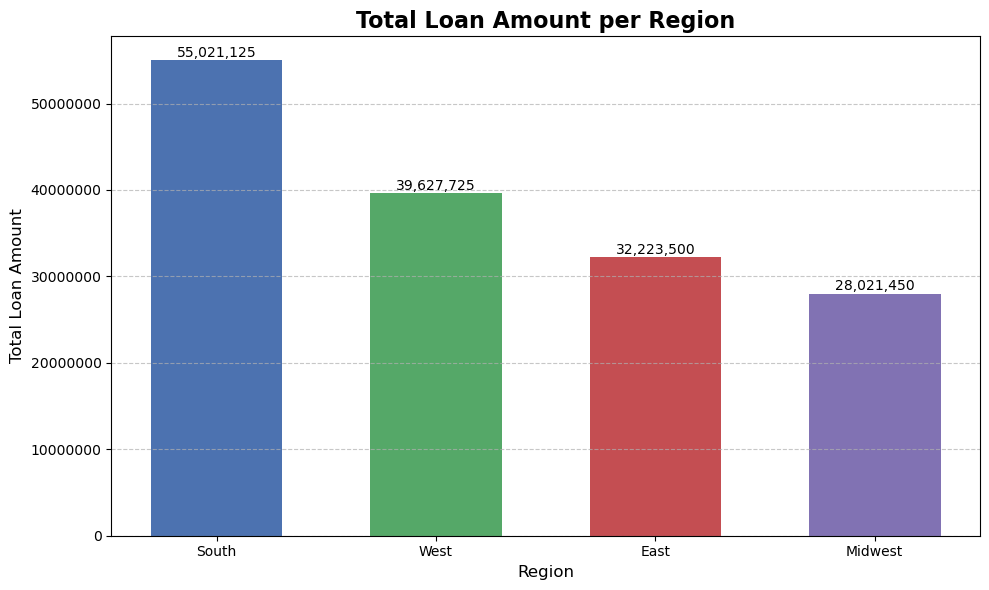

In [124]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Ensure numeric columns ---
data_vz['loan_amnt'] = pd.to_numeric(data_vz['loan_amnt'], errors='coerce')
data_vz['state_address'] = pd.to_numeric(data_vz['state_address'], errors='coerce')

# --- Drop rows with missing values ---
data_vz = data_vz.dropna(subset=['loan_amnt', 'state_address'])

# --- Convert state_address to int to match mapping keys ---
data_vz['state_address'] = data_vz['state_address'].astype(int)

# --- Map numeric codes to region names ---
region_map = {1: 'West', 2: 'South', 3: 'Midwest', 4: 'East'}

# --- Keep only valid state_address values ---
data_vz = data_vz[data_vz['state_address'].isin(region_map.keys())]

# --- Group by state_address and sum loans ---
loan_by_state = data_vz.groupby('state_address')['loan_amnt'].sum().sort_values(ascending=False)

# --- Map index to region names ---
loan_by_state.index = loan_by_state.index.map(region_map)

# --- Plot with custom colors ---
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B3']

plt.figure(figsize=(10,6))
bars = plt.bar(loan_by_state.index, loan_by_state.values, color=colors, width=0.6)

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, f'{int(yval):,}', 
             ha='center', va='bottom', fontsize=10)

# Title and labels
plt.title("Total Loan Amount per Region", fontsize=16, fontweight='bold')
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total Loan Amount", fontsize=12)

# Gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# X-axis labels horizontal
plt.xticks(rotation=0)

# Show full numbers on y-axis
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()



In [125]:
np.unique(loan_data[:,7])

array(['0.0', '1.0', 'loan_status'], dtype='<U32')

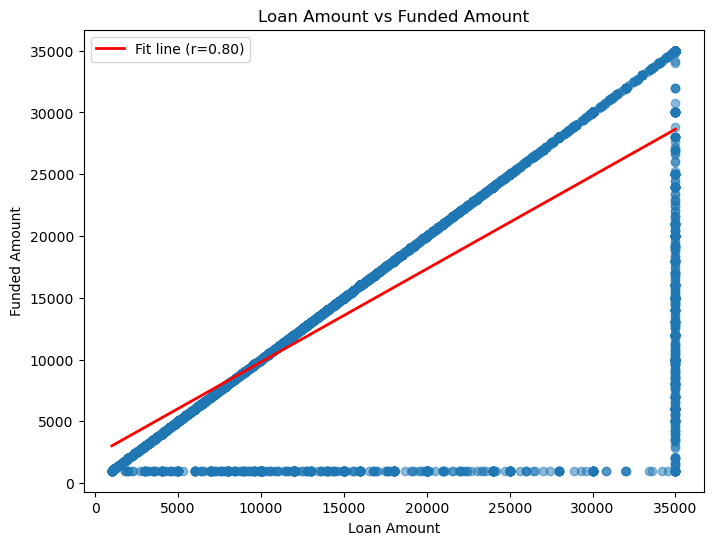

Correlation coefficient: 0.7961794099020039


In [126]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(data_vz['loan_amnt'], data_vz['funded_amnt'], alpha=0.5)

# Linear regression to draw a trend line
slope, intercept, r_value, p_value, std_err = linregress(data_vz['loan_amnt'], data_vz['funded_amnt'])
x = np.array([data_vz['loan_amnt'].min(), data_vz['loan_amnt'].max()])
y = slope * x + intercept
plt.plot(x, y, color='red', linewidth=2, label=f'Fit line (r={r_value:.2f})')

# Labels and title
plt.title("Loan Amount vs Funded Amount")
plt.xlabel("Loan Amount")
plt.ylabel("Funded Amount")
plt.legend()
plt.show()

# Check correlation numerically
correlation = data_vz['loan_amnt'].corr(data_vz['funded_amnt'])
print("Correlation coefficient:", correlation)


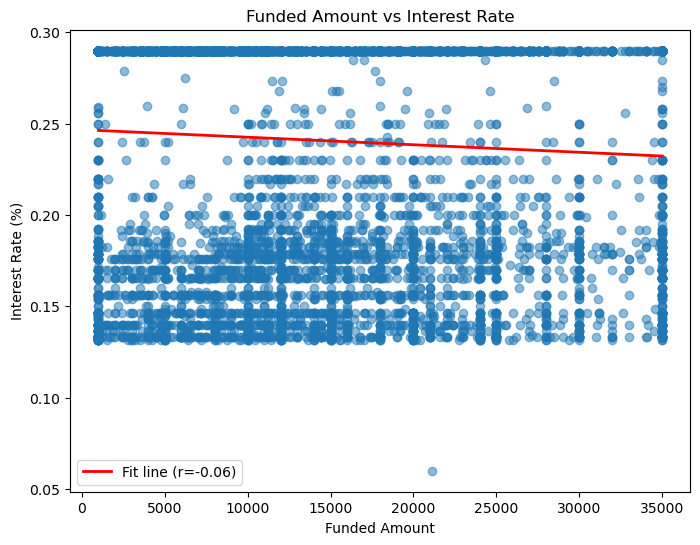

In [127]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(data_vz['funded_amnt'], data_vz['int_rate'])
x = np.array([data_vz['funded_amnt'].min(), data_vz['funded_amnt'].max()])
y = slope * x + intercept

plt.figure(figsize=(8,6))
plt.scatter(data_vz['funded_amnt'], data_vz['int_rate'], alpha=0.5)
plt.plot(x, y, color='red', linewidth=2, label=f'Fit line (r={r_value:.2f})')
plt.title("Funded Amount vs Interest Rate")
plt.xlabel("Funded Amount")
plt.ylabel("Interest Rate (%)")
plt.legend()
plt.show()

### THE END OF THE PROJECT THANK. YOU FOR YOUR PATIENCE!!!